In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

plt.rc('font', family='AppleGothic')

/Users/leebeomsu/Desktop/DShackathon/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df = pd.read_csv('./data/forecasting_dataset(2010-2032).csv', encoding='utf-8')
df
data = df
use_cols = ['총인구수(명)', '유치원 수', '초등학교 수', '출생건수', '사망건수', '혼인건수', '이혼건수', '학령인구(명)']

In [3]:
df

,행정구역(시도),행정구역(시군구),연도,총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),행정구역
0,강원특별자치도,강릉시,2010,218503.0,40.0,35.0,1641.0,1413.0,1071.0,487.0,43102.0,강원특별자치도 강릉시
1,강원특별자치도,강릉시,2011,217571.0,40.0,35.0,1671.0,1434.0,1140.0,496.0,41960.0,강원특별자치도 강릉시
2,강원특별자치도,강릉시,2012,217741.0,40.0,35.0,1636.0,1490.0,1107.0,475.0,41589.0,강원특별자치도 강릉시
3,강원특별자치도,강릉시,2013,216806.0,40.0,35.0,1460.0,1471.0,1026.0,528.0,40758.0,강원특별자치도 강릉시
4,강원특별자치도,강릉시,2014,215807.0,41.0,35.0,1298.0,1539.0,983.0,473.0,39345.0,강원특별자치도 강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...
5124,충청북도,충주시,2028,200258.0,40.0,29.0,443.0,3965.0,589.0,392.0,22297.0,충청북도 충주시
5125,충청북도,충주시,2029,198739.0,40.0,28.0,372.0,4281.0,560.0,385.0,21256.0,충청북도 충주시
5126,충청북도,충주시,2030,197725.0,39.0,27.0,301.0,4596.0,531.0,378.0,20215.0,충청북도 충주시
5127,충청북도,충주시,2031,196193.0,39.0,26.0,230.0,4911.0,502.0,371.0,19174.0,충청북도 충주시


In [4]:
df['행정구역'].value_counts()

행정구역
강원특별자치도 강릉시    23
인천광역시 남동구      23
서울특별시 은평구      23
서울특별시 종로구      23
서울특별시 중구       23
               ..
경상북도 영양군       23
경상북도 영주시       23
경상북도 영천시       23
경상북도 예천군       23
충청북도 충주시       23
Name: count, Length: 223, dtype: int64

In [5]:
# 데이터 전처리
scaler = MinMaxScaler()
df[use_cols] = scaler.fit_transform(df[use_cols])

In [6]:
# 연도가 2013부터 2020까지인 데이터 추출
filtered_df = df[(df['연도'] >= 2010) & (df['연도'] <= 2021)]

# 결과 출력
print(filtered_df)

     행정구역(시도) 행정구역(시군구)    연도   총인구수(명)     유치원 수    초등학교 수      출생건수  \
0     강원특별자치도       강릉시  2010  0.167264  0.179916  0.267176  0.214527   
1     강원특별자치도       강릉시  2011  0.166520  0.179916  0.267176  0.216781   
2     강원특별자치도       강릉시  2012  0.166656  0.179916  0.267176  0.214152   
3     강원특별자치도       강릉시  2013  0.165910  0.179916  0.267176  0.200931   
4     강원특별자치도       강릉시  2014  0.165113  0.184100  0.267176  0.188763   
...       ...       ...   ...       ...       ...       ...       ...   
5113     충청북도       충주시  2017  0.159136  0.200837  0.290076  0.183956   
5114     충청북도       충주시  2018  0.160882  0.205021  0.290076  0.178021   
5115     충청북도       충주시  2019  0.161068  0.196653  0.282443  0.173890   
5116     충청북도       충주시  2020  0.160628  0.196653  0.274809  0.169534   
5117     충청북도       충주시  2021  0.159967  0.196653  0.274809  0.162923   

          사망건수      혼인건수      이혼건수   학령인구(명)         행정구역  
0     0.063235  0.221310  0.309744  0.176924  강원특별자치도 강릉시  
1  

In [7]:
filtered_df

,행정구역(시도),행정구역(시군구),연도,총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),행정구역
0,강원특별자치도,강릉시,2010,0.167264,0.179916,0.267176,0.214527,0.063235,0.221310,0.309744,0.176924,강원특별자치도 강릉시
1,강원특별자치도,강릉시,2011,0.166520,0.179916,0.267176,0.216781,0.064215,0.228766,0.312821,0.172243,강원특별자치도 강릉시
2,강원특별자치도,강릉시,2012,0.166656,0.179916,0.267176,0.214152,0.066828,0.225200,0.305641,0.170723,강원특별자치도 강릉시
3,강원특별자치도,강릉시,2013,0.165910,0.179916,0.267176,0.200931,0.065942,0.216447,0.323761,0.167317,강원특별자치도 강릉시
4,강원특별자치도,강릉시,2014,0.165113,0.184100,0.267176,0.188763,0.069115,0.211800,0.304957,0.161526,강원특별자치도 강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...
5113,충청북도,충주시,2017,0.159136,0.200837,0.290076,0.183956,0.075042,0.208667,0.306325,0.138192,충청북도 충주시
5114,충청북도,충주시,2018,0.160882,0.205021,0.290076,0.178021,0.075462,0.213962,0.313162,0.134905,충청북도 충주시
5115,충청북도,충주시,2019,0.161068,0.196653,0.282443,0.173890,0.075415,0.199589,0.310769,0.130290,충청북도 충주시
5116,충청북도,충주시,2020,0.160628,0.196653,0.274809,0.169534,0.075789,0.193214,0.309060,0.125556,충청북도 충주시


In [8]:
# 시퀀스 데이터 생성
def create_sequence_data(data, sequence_length):
    sequences = []
    for region in data['행정구역'].unique().tolist():
        temp_df = data[data['행정구역'] == region]
        if len(temp_df) < sequence_length:
            continue

        temp_df = temp_df[use_cols]
        for i in range(len(temp_df) - sequence_length):
            seq = temp_df[i:i+sequence_length+1]
            sequences.append(seq)
    return np.array(sequences)

In [9]:
sequence_length = 3  # 시퀀스 길이
sequences = create_sequence_data(filtered_df, sequence_length)

In [10]:
sequences.shape

(2007, 4, 8)

In [11]:
# 데이터셋 분리
X = sequences[:, :-1]
y = sequences[:, -1][:, -1]

In [16]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)


In [17]:
def invTransform(scaler, data, colName, colNames):
    dummy = pd.DataFrame(np.zeros((len(data), len(colNames))), columns=colNames)
    dummy[colName] = data
    dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=colNames)
    return dummy[colName].values

In [18]:
# MAPE 계산 함수
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [19]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

# Specify the number of iterations
num_iterations = 100
mape_list = []
min_mape = float('inf')  # Initialize with positive infinity

for iteration in range(num_iterations):
    # Create the model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Define early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Fit the model with early stopping
    model.fit(X_train, y_train, epochs=1000, verbose=0, validation_data=(X_val, y_val), callbacks=[early_stopping])

    # Predict
    predicted_data = model.predict(X_test)
    predicted_data = invTransform(scaler, predicted_data, '학령인구(명)', use_cols).reshape(-1, 1)
    predicted_data = predicted_data.round()
    y_true = invTransform(scaler, y_test, '학령인구(명)', use_cols).reshape(-1, 1)

    # Evaluate MAPE
    mape = calculate_mape(y_true, predicted_data)
    print(f'{iteration}th: Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
    mape_list.append(mape)

    # Check if the current MAPE is the new minimum
    if mape < min_mape:
        min_mape = mape
        # Save the model when a new minimum is reached
        model.save('best_model.h5')

# Calculate and print the average and minimum MAPE
average_mape = np.mean(mape_list)
print(f'Average Mean Absolute Percentage Error (MAPE) over {num_iterations} iterations: {average_mape:.2f}%')
print(f'Minimum Mean Absolute Percentage Error (MAPE) over {num_iterations} iterations: {min_mape:.2f}%')


13/13 [==============================] - 0s 883us/step
0th: Mean Absolute Percentage Error (MAPE): 5.37%


/Users/leebeomsu/Desktop/DShackathon/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 0s 789us/step
1th: Mean Absolute Percentage Error (MAPE): 3.77%


/Users/leebeomsu/Desktop/DShackathon/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 0s 817us/step
2th: Mean Absolute Percentage Error (MAPE): 4.74%
13/13 [==============================] - 0s 782us/step
3th: Mean Absolute Percentage Error (MAPE): 4.73%
13/13 [==============================] - 0s 799us/step
4th: Mean Absolute Percentage Error (MAPE): 5.21%
13/13 [==============================] - 0s 859us/step
5th: Mean Absolute Percentage Error (MAPE): 4.51%
13/13 [==============================] - 0s 803us/step
6th: Mean Absolute Percentage Error (MAPE): 5.50%
13/13 [==============================] - 0s 770us/step
7th: Mean Absolute Percentage Error (MAPE): 3.87%
13/13 [==============================] - 0s 781us/step
8th: Mean Absolute Percentage Error (MAPE): 5.69%
13/13 [==============================] - 0s 790us/step
9th: Mean Absolute Percentage Error (MAPE): 5.21%
13/13 [==============================] - 0s 859us/step
10th: Mean Absolute Percentage Error (MAPE): 4.01%
13/13 [==============================] - 0s 801us/step

/Users/leebeomsu/Desktop/DShackathon/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 0s 869us/step
20th: Mean Absolute Percentage Error (MAPE): 4.70%
13/13 [==============================] - 0s 802us/step
21th: Mean Absolute Percentage Error (MAPE): 4.90%
13/13 [==============================] - 0s 786us/step
22th: Mean Absolute Percentage Error (MAPE): 3.86%
13/13 [==============================] - 0s 793us/step
23th: Mean Absolute Percentage Error (MAPE): 5.13%
13/13 [==============================] - 0s 816us/step
24th: Mean Absolute Percentage Error (MAPE): 5.95%
13/13 [==============================] - 0s 873us/step
25th: Mean Absolute Percentage Error (MAPE): 5.76%
13/13 [==============================] - 0s 890us/step
26th: Mean Absolute Percentage Error (MAPE): 5.56%
13/13 [==============================] - 0s 789us/step
27th: Mean Absolute Percentage Error (MAPE): 5.80%
13/13 [==============================] - 0s 797us/step
28th: Mean Absolute Percentage Error (MAPE): 3.15%


/Users/leebeomsu/Desktop/DShackathon/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 0s 794us/step
29th: Mean Absolute Percentage Error (MAPE): 5.37%
13/13 [==============================] - 0s 815us/step
30th: Mean Absolute Percentage Error (MAPE): 7.75%
13/13 [==============================] - 0s 831us/step
31th: Mean Absolute Percentage Error (MAPE): 4.28%
13/13 [==============================] - 0s 802us/step
32th: Mean Absolute Percentage Error (MAPE): 5.10%
13/13 [==============================] - 0s 779us/step
33th: Mean Absolute Percentage Error (MAPE): 5.82%
13/13 [==============================] - 0s 786us/step
34th: Mean Absolute Percentage Error (MAPE): 4.24%
13/13 [==============================] - 0s 803us/step
35th: Mean Absolute Percentage Error (MAPE): 4.73%
13/13 [==============================] - 0s 805us/step
36th: Mean Absolute Percentage Error (MAPE): 5.87%
13/13 [==============================] - 0s 795us/step
37th: Mean Absolute Percentage Error (MAPE): 6.81%
13/13 [==============================] - 0s 81

In [20]:
prediction_df = df[df['연도'].isin([i for i in range(2019, 2023)])]

In [21]:
prediction_df

,행정구역(시도),행정구역(시군구),연도,총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),행정구역
9,강원특별자치도,강릉시,2019,0.163226,0.163180,0.259542,0.163675,0.077562,0.202075,0.312137,0.133524,강원특별자치도 강릉시
10,강원특별자치도,강릉시,2020,0.163129,0.167364,0.267176,0.162623,0.077049,0.192133,0.285128,0.126860,강원특별자치도 강릉시
11,강원특별자치도,강릉시,2021,0.162845,0.167364,0.267176,0.158266,0.077095,0.191917,0.286838,0.122216,강원특별자치도 강릉시
12,강원특별자치도,강릉시,2022,0.161582,0.167364,0.274809,0.158341,0.094363,0.180246,0.281709,0.116523,강원특별자치도 강릉시
32,강원특별자치도,고성군,2019,0.014675,0.058577,0.099237,0.100804,0.011154,0.119624,0.162735,0.012365,강원특별자치도 고성군
...,...,...,...,...,...,...,...,...,...,...,...,...
5095,충청북도,청주시,2022,0.670781,0.560669,0.717557,0.442124,0.255367,0.494165,0.710427,0.556983,충청북도 청주시
5115,충청북도,충주시,2019,0.161068,0.196653,0.282443,0.173890,0.075415,0.199589,0.310769,0.130290,충청북도 충주시
5116,충청북도,충주시,2020,0.160628,0.196653,0.274809,0.169534,0.075789,0.193214,0.309060,0.125556,충청북도 충주시
5117,충청북도,충주시,2021,0.159967,0.196653,0.274809,0.162923,0.079895,0.186298,0.292308,0.121548,충청북도 충주시


In [22]:
predict_sequences = create_sequence_data(prediction_df, sequence_length)

In [23]:
predict_sequences

array([[[0.16322595, 0.16317992, 0.25954198, ..., 0.20207478,
         0.31213675, 0.13352405],
        [0.16312941, 0.16736402, 0.26717557, ..., 0.19213313,
         0.28512821, 0.12685974],
        [0.16284536, 0.16736402, 0.26717557, ..., 0.19191701,
         0.28683761, 0.12221603],
        [0.16158152, 0.16736402, 0.27480916, ..., 0.18024638,
         0.2817094 , 0.11652308]],

       [[0.01467538, 0.05857741, 0.09923664, ..., 0.11962395,
         0.16273504, 0.01236546],
        [0.01427404, 0.05857741, 0.09923664, ..., 0.11616598,
         0.16376068, 0.01153755],
        [0.0146666 , 0.05857741, 0.09923664, ..., 0.11562568,
         0.16376068, 0.0113777 ],
        [0.01468655, 0.05857741, 0.09923664, ..., 0.11757078,
         0.16205128, 0.01113179]],

       [[0.06515075, 0.08368201, 0.10687023, ..., 0.14685541,
         0.23008547, 0.0598436 ],
        [0.0652074 , 0.08368201, 0.10687023, ..., 0.14091204,
         0.21606838, 0.05855254],
        [0.06479889, 0.08368201, 0.1

In [24]:
# 데이터셋 분리
predict_X = predict_sequences[:, :-1]
predict_y = predict_sequences[:, -1][:, -1]

In [25]:
predict_X

array([[[0.16322595, 0.16317992, 0.25954198, ..., 0.20207478,
         0.31213675, 0.13352405],
        [0.16312941, 0.16736402, 0.26717557, ..., 0.19213313,
         0.28512821, 0.12685974],
        [0.16284536, 0.16736402, 0.26717557, ..., 0.19191701,
         0.28683761, 0.12221603]],

       [[0.01467538, 0.05857741, 0.09923664, ..., 0.11962395,
         0.16273504, 0.01236546],
        [0.01427404, 0.05857741, 0.09923664, ..., 0.11616598,
         0.16376068, 0.01153755],
        [0.0146666 , 0.05857741, 0.09923664, ..., 0.11562568,
         0.16376068, 0.0113777 ]],

       [[0.06515075, 0.08368201, 0.10687023, ..., 0.14685541,
         0.23008547, 0.0598436 ],
        [0.0652074 , 0.08368201, 0.10687023, ..., 0.14091204,
         0.21606838, 0.05855254],
        [0.06479889, 0.08368201, 0.10687023, ..., 0.14220877,
         0.20717949, 0.05645406]],

       ...,

       [[0.05762038, 0.07949791, 0.11450382, ..., 0.15290685,
         0.21982906, 0.05364652],
        [0.05972199, 

In [26]:
predict_y

array([0.11652308, 0.01113179, 0.05440886, 0.03351832, 0.0466953 ,
       0.01230398, 0.01156624, 0.01716902, 0.2267917 , 0.01593944,
       0.01507873, 0.0227718 , 0.17452641, 0.02216111, 0.01726329,
       0.03079275, 0.01175477, 0.02091923, 0.02835409, 0.65636963,
       0.05190052, 0.18634676, 0.2338085 , 0.11213348, 0.15997639,
       0.34806095, 0.5140131 , 0.05251941, 0.43329125, 0.54763798,
       0.75424819, 0.34153599, 0.38424336, 0.1141172 , 0.32303903,
       0.16291918, 0.06261425, 0.01977572, 0.16569393, 0.78081939,
       0.09380866, 0.27224513, 0.14368857, 0.33755625, 0.36824654,
       0.07303698, 0.21082767, 0.69831466, 0.18478929, 0.03530121,
       0.0245178 , 0.38654677, 0.01709524, 0.04716664, 0.06471683,
       0.01227939, 0.23518972, 0.00911938, 0.22465223, 0.02448091,
       0.63605699, 0.07846352, 0.01600912, 0.03490364, 0.0172141 ,
       0.01414016, 0.15671391, 0.13001976, 0.01187363, 0.29258646,
       0.00586099, 0.0791111 , 0.03448149, 0.01107031, 0.04603

In [27]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('best_model.h5')

7/7 [==============================] - 0s 1ms/step


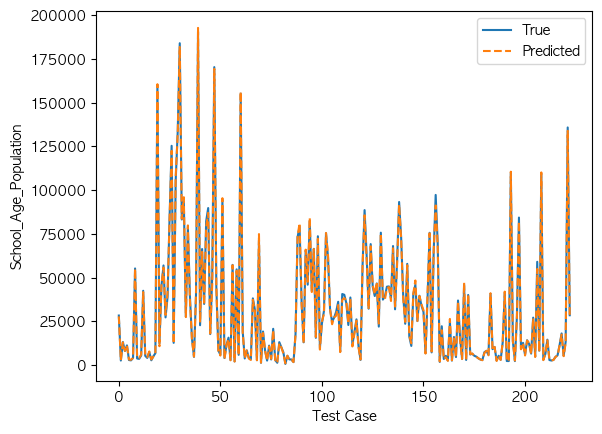

Mean Squared Error: 1504327.82
Mean Absolute Percentage Error (MAPE): 4.19%


In [28]:
# 예측
predicted_data = best_model.predict(predict_X)

# 예측 결과 역전환
#predicted_data = scaler.inverse_transform(predicted_data)
predicted_data = invTransform(scaler, predicted_data, '학령인구(명)', use_cols).reshape(-1, 1)
predicted_data = predicted_data.round()
#y_true = scaler.inverse_transform(y_test.reshape(-1, 1))
y_true = invTransform(scaler, predict_y, '학령인구(명)', use_cols).reshape(-1, 1)

# 결과 시각화
plt.plot(range(len(y_true)), y_true, label='True')
plt.plot(range(len(predicted_data)), predicted_data, label='Predicted', linestyle='--')
plt.xlabel('Test Case')
plt.ylabel('School_Age_Population')
plt.legend()
plt.show()

# 모델 평가
mse = mean_squared_error(y_true, predicted_data)
print(f'Mean Squared Error: {mse:.2f}')

# MAPE 계산 함수
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# MAPE 계산
mape = calculate_mape(y_true, predicted_data)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

In [29]:
prediction = df[df['연도'].isin([i for i in range(2020, 2033)])]

In [30]:
prediction

,행정구역(시도),행정구역(시군구),연도,총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),행정구역
10,강원특별자치도,강릉시,2020,0.163129,0.167364,0.267176,0.162623,0.077049,0.192133,0.285128,0.126860,강원특별자치도 강릉시
11,강원특별자치도,강릉시,2021,0.162845,0.167364,0.267176,0.158266,0.077095,0.191917,0.286838,0.122216,강원특별자치도 강릉시
12,강원특별자치도,강릉시,2022,0.161582,0.167364,0.274809,0.158341,0.094363,0.180246,0.281709,0.116523,강원특별자치도 강릉시
13,강원특별자치도,강릉시,2023,0.160335,0.167364,0.274809,0.153234,0.094829,0.181219,0.280684,0.111056,강원특별자치도 강릉시
14,강원특별자치도,강릉시,2024,0.159081,0.167364,0.282443,0.148577,0.097629,0.175167,0.277607,0.105514,강원특별자치도 강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...
5124,충청북도,충주시,2028,0.152707,0.179916,0.221374,0.124540,0.182332,0.169224,0.277265,0.091653,충청북도 충주시
5125,충청북도,충주시,2029,0.151495,0.179916,0.213740,0.119207,0.197079,0.166090,0.274872,0.087386,충청북도 충주시
5126,충청북도,충주시,2030,0.150686,0.175732,0.206107,0.113874,0.211779,0.162957,0.272479,0.083120,충청북도 충주시
5127,충청북도,충주시,2031,0.149463,0.175732,0.198473,0.108541,0.226479,0.159823,0.270085,0.078853,충청북도 충주시


In [42]:
# 시퀀스 데이터 생성
def create_sequence_data1(data, sequence_length):
    sequences = []
    regions = []
    year = []
    for region in data['행정구역'].unique().tolist():
        temp_df = data[data['행정구역'] == region]
        if len(temp_df) < sequence_length:
            continue

        year.extend([i for i in range(2023, 2033+1)])
        temp_df = temp_df[use_cols]
        for i in range(len(temp_df) - sequence_length+1):
            regions.append(region)
            seq = temp_df[i:i+sequence_length]
            sequences.append(seq)
    return np.array(sequences), np.array(regions), np.array(year)

In [43]:
X_sequences, r, y = create_sequence_data1(prediction, sequence_length)

In [44]:
X_sequences

array([[[0.16312941, 0.16736402, 0.26717557, ..., 0.19213313,
         0.28512821, 0.12685974],
        [0.16284536, 0.16736402, 0.26717557, ..., 0.19191701,
         0.28683761, 0.12221603],
        [0.16158152, 0.16736402, 0.27480916, ..., 0.18024638,
         0.2817094 , 0.11652308]],

       [[0.16284536, 0.16736402, 0.26717557, ..., 0.19191701,
         0.28683761, 0.12221603],
        [0.16158152, 0.16736402, 0.27480916, ..., 0.18024638,
         0.2817094 , 0.11652308],
        [0.16033524, 0.16736402, 0.27480916, ..., 0.18121893,
         0.28068376, 0.11105555]],

       [[0.16158152, 0.16736402, 0.27480916, ..., 0.18024638,
         0.2817094 , 0.11652308],
        [0.16033524, 0.16736402, 0.27480916, ..., 0.18121893,
         0.28068376, 0.11105555],
        [0.15908097, 0.16736402, 0.28244275, ..., 0.1751675 ,
         0.27760684, 0.10551425]],

       ...,

       [[0.15270672, 0.17991632, 0.22137405, ..., 0.16922412,
         0.27726496, 0.0916528 ],
        [0.15149475, 

In [45]:
r

array(['강원특별자치도 강릉시', '강원특별자치도 강릉시', '강원특별자치도 강릉시', ..., '충청북도 충주시',
       '충청북도 충주시', '충청북도 충주시'], dtype='<U12')

In [46]:
X_sequences[1]

array([[0.16284536, 0.16736402, 0.26717557, 0.15826636, 0.07709539,
        0.19191701, 0.28683761, 0.12221603],
       [0.16158152, 0.16736402, 0.27480916, 0.15834147, 0.09436252,
        0.18024638, 0.2817094 , 0.11652308],
       [0.16033524, 0.16736402, 0.27480916, 0.15323368, 0.0948292 ,
        0.18121893, 0.28068376, 0.11105555]])

In [47]:
# 예측
predicted_data = model.predict(X_sequences)

77/77 [==============================] - 0s 1ms/step


In [48]:
predicted_data = invTransform(scaler, predicted_data, '학령인구(명)', use_cols).reshape(-1, 1)


In [49]:
predicted_data.round()


array([[27381.],
       [25834.],
       [24144.],
       ...,
       [ 9113.],
       [ 7042.],
       [ 5073.]])

In [50]:
predicted_df = pd.DataFrame({'연도': y, '행정구역': r, '학령인구(명)': predicted_data.round().flatten()})

In [53]:
wonju_df = predicted_df[predicted_df['행정구역'] == '강원특별자치도 원주시']

In [54]:
wonju_df

,연도,행정구역,학령인구(명)
88,2023,강원특별자치도 원주시,54753.0
89,2024,강원특별자치도 원주시,52618.0
90,2025,강원특별자치도 원주시,50109.0
91,2026,강원특별자치도 원주시,47631.0
92,2027,강원특별자치도 원주시,44893.0
93,2028,강원특별자치도 원주시,42380.0
94,2029,강원특별자치도 원주시,39978.0
95,2030,강원특별자치도 원주시,37625.0
96,2031,강원특별자치도 원주시,35220.0
97,2032,강원특별자치도 원주시,33079.0


In [55]:
use_region = ['강원특별자치도 원주시', '강원특별자치도 춘천시', '강원특별자치도 강릉시']

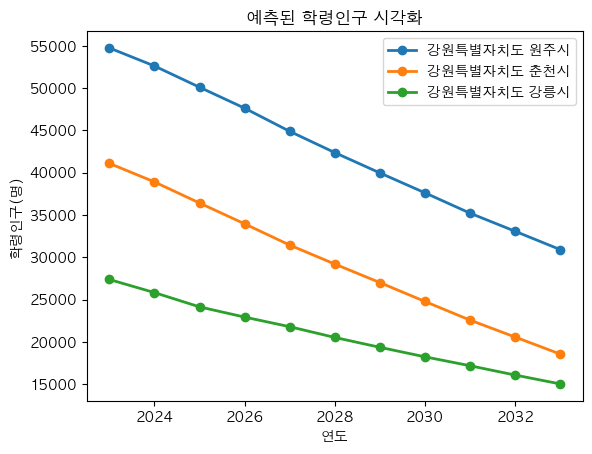

In [58]:
import matplotlib.pyplot as plt

# Iterate through each region
for region in use_region:
    temp_df = predicted_df[predicted_df['행정구역'] == region]
    plt.plot(temp_df['연도'], temp_df['학령인구(명)'], label=region, marker='o', linestyle='-', linewidth=2)

# Add labels and title
plt.xlabel('연도')
plt.ylabel('학령인구(명)')
plt.title('예측된 학령인구 시각화')

# Add legend
plt.legend()

# Display the plot
plt.show()


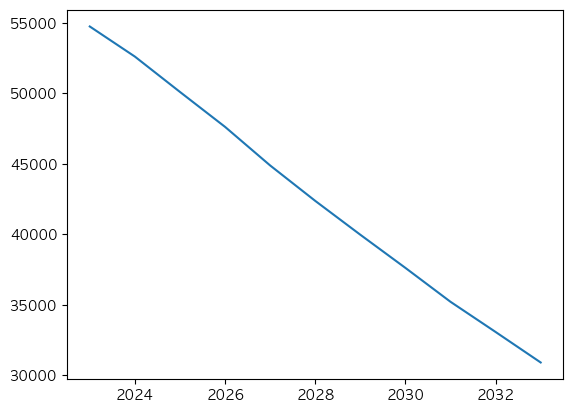

In [57]:
plt.plot(wonju_df['연도'], wonju_df['학령인구(명)'], label='원주시')